# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
#from sklearn.cross_validation import ShuffleSplit
# Changing the code to prevent warning. A
from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

C:\Users\BeGood\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\BeGood\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


Boston housing dataset has 489 data points with 4 variables each.


In [2]:
######################
# Added By A
# Observing the dataset

data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


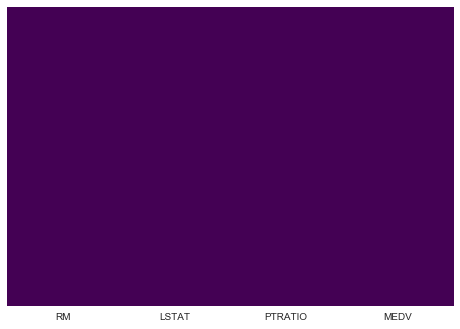

In [3]:
##########################
# Added By A
# Checking for missing values
# If there is a missing value(Nan) for a feature it would be seen as a yellow bar for that feature
import seaborn as sns

sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

## Result: there isn't any Nan value

## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [2]:
# TODO: Minimum price of the data
minimum_price = np.min(data['MEDV'])

# TODO: Maximum price of the data
maximum_price = np.max(data['MEDV'])

# TODO: Mean price of the data
mean_price = np.mean(data['MEDV'])

# TODO: Median price of the data
median_price = np.median(data['MEDV'])

# TODO: Standard deviation of prices of the data
std_price = np.std(data['MEDV'])

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

**Answer: **

**RM**<br>
Number of rooms among homes usually increcases the price so it seems that a home with RM value of 6 to be less than a home that has an RM value of 7

**LSTAT** <br>
Neigbors and their income states or their jobs has somhow a direct effect, as an old said: "richer poeple wants to live near other richer poeple", so the percentage of lowclass homeowners in a neighberhood usually has a reverse effect on price and an LSTAT value of 15 has home prices be worth more than a neiborhood that has a LSTAT value of 20

**PTRATIO**<br>


This is the interesting one. <br>
At first look, it seems that ratio of students to teachers in schools has a little effect on increasing price unless this ratio would be significant.

But wait a minute, if it is the result of another parameter that we didn't count and that parameter causes increasing the price?

This parameter: People’s desire to live in a neighborhood for a specific reason.

I explain it with a real example. In GTA (Great Toronto Area) one of the major concern of parents is when their children reach Secondary or High School age they wants to register them in one of the best public secondary school that they can. So they usually move to some other neighborhoods that there are better secondary schools. 

One of these neighborhoods (towns) is Richmond Hill which has 5 secondary schools and all of them are one of the best schools in GTA. One of them is Canada’s top 5 ranking and two of them are in Toronto’s top 10 ranking, for example, look at this report from Fraser Institute: 
http://ontario.compareschoolrankings.org/secondary/SchoolsByRankLocationName.aspx

Due to high demand, even for renting, the price of the house is a little bit higher than usual and also the percentage of students to teachers is a little bit higher than other neighborhoods.

If such phenomenon exists in Boston we have to consider it as a parameter.Assuming that if this phenomenon does not exist in Boston then this factor could decrease the price.


----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [11]:
data.columns

Index(['RM', 'LSTAT', 'PTRATIO', 'MEDV'], dtype='object')

In [3]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [4]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer:**

I choose lake of information.

R^2 score is 0.923 which means it is near 1 and 92.3 percent of dependent variable y can be predicted by independent variable x.  

If this dataset is the main dataset then this model is successful but if it is a subset and sample of another bigger dataset (such as a population) the R^2 score needs an adjustment.
For example see this paper:
http://people.duke.edu/~rnau/rsquared.htm


### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [4]:
# Added By A
# Grabbing column named
data.columns

Index(['RM', 'LSTAT', 'PTRATIO', 'MEDV'], dtype='object')

In [5]:
# Defining features and target variable for prediction

X = data[['RM', 'LSTAT', 'PTRATIO']]

y = data['MEDV']

In [6]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer: **

Training the model and testing it with same data is a big methodological mistake. The model may have a good score in testing but it fails to predict when it faces up to new unseen data. This situation is called overfitting. 


Splitting the data in two datasets, one for training and one for testing, will solve this problem. As we don't use part of the data in training, we can see how a model predict actually an yet-unseen data.  
 


----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

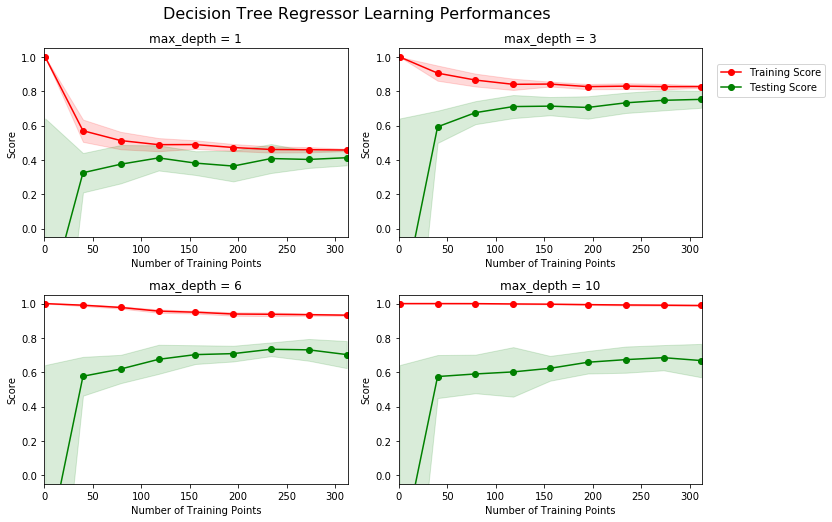

In [6]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(X_train, y_train)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer: **

Based on the output of the learning curves Max_depth 1 is an underfitting model and Max depth 6 and 10 are overfitting models 
 
max_depth = 3 is the right model.

Training curve: :<br>
Starting with few training points the score is high (less error) and by adding more training points the score slightly decreases till it shapes a line parallel to X-axis (number of training points).

Testing curve: :<br>
Starting with few training points the score is low (high error) and by adding more data points the score increases rapidly first but this speed decreases further till it shapes a line parallel to X-axis.

Training and Testing curves are converging near the score 0.8 (near to score 1) which is another sign that shows this is the right model.

It seems for this model adding more points is not necessary.

Adding more points:
Adding some extra points after converging is like a double-edged knife and may help us to analyze the behavior of the model better or mislead us.

An example of pros of adding more points:<br>
In an overfitting model, because the model does not generalize well, training and validation curves do not actually converge and always there is always a noticable distance between them. So if the curves start to converge again by adding
some extra points we have to suspect and check what's happened.

An example of Cons of adding more points:<br>
If the data is so noisy and we couldn’t clean it well, adding more points maybe causes a doubt for finding a good model. 



### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

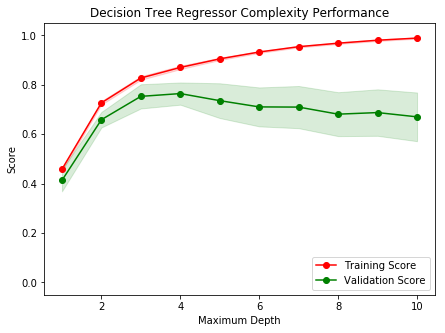

In [20]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Answer: **

Max_depth 1:<br>
The model suffers from High Bias. Training and validation points are close to each other and the score is low, even lower than other parts of the diagram, which means that the error is high and the model cannot pick up the nuances of data.

Max_depth 10:<br>
The model suffers from High Variance. Training and validation points are far from each other, as far as possible in the diagram. For training point, the score is higher than the other part of the diagram but for validation point is low which means that the model is good for training points but fails for testing points.  

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer: **

Max_depth (MD) of 4.

In terms of score MD of 3 and 4 are close to each other, in fact MD of 4’s score is a little bit higher. 

I chose MD 4 for these reasons:

1-	With MD of 3 Training and validation scores are near too close to each other than MD of 4 and it seems there is still a little bias in MD 3. <br>
2-	After MD 4 validation score starts to decrease that shows MD 4 is turning point.


-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer: **

A grid search is an exhaustive brute force technique for finding best value of hyperparameters for optimization (for example highest F1 score). It defines a grid over the value of the hyperparameters and tries to evaluate the performance of the model for each point of the grid. 

For example in SVM, kernel and C (Gama) are hyperparameters, first by training set we train a different type of kernel  (linear, polynomial etc.) with a different value of C in a table and by using validation set we calculate the F1 Score. Finally, we choose the model that has the best F1 score.


### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer: **

Testing a model with same data that it is used for training is a methodological problem that causes the model has a high score in training but a low score facing unseen data. This problem called overfitting. 
<br>A solution for this problem is splitting data to training and testing datasets.

Sometimes during evaluating different hyperparameters, there is a chance of having a leak about knowledge of testing dataset, especially when there is a need for a range of estimation for the value of hyperparameters till model would be optimized. 
<br>A solution for this problem called cross-validation which the training dataset split to two other datasets: training and validation sets.

However breaking data to three sets training, testing and validation causes that the model looses a bunch of data for learning.<br> 
There is a solution for this problem (again) called cross-validation. Cross-validation means using a different part of training dataset as validation in different time sets. 

One type of cross-validation is K-fold cross-validation. <br>
In K-fold cross-validation, the training dataset is breaking to (randomly) K buckets which, there is usually same points in each. One bucket is used as validating set and k-1 bucket as the training set. This process repeats k times.<br>
The point is a bucket is used for validation exactly only once.


Benefits of using Cross-validation technique with grid search: <br>
1-	One technique to find the optimum model in grid search is finding the model which has the highest F1 score. For Calculating the F1 Score, the data that is used in grid search is the cross-validation data.<br>
2-	As Grid search is an exhaustive brute-force technique there is always a probability of leak of testing information in this technique because of lurching the value of hyperparameters for finding the optimum value. 
    

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [7]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn version 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    #cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.1, train_size = None, random_state = None)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': list(range(1, 11))}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.htmlregressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator = regressor, param_grid = params, scoring = scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [9]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
# Added by A: Python 3 format
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


** Hint: ** The answer comes from the output of the code snipped above.

**Answer: **
Parameter 'max_depth' 4 for the optimal model.<br>

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [10]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


**Answer: **

Recap:

Statistics for Boston housing dataset:

Minimum price: $105,000.00

Maximum price: $1,024,800.00 

Mean price: $454,342.94   

Median price $438,900.00 

Standard deviation of prices: $165,171.13


First lets analyze the RM, LSTAT, and PTRATIO based on the price:


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

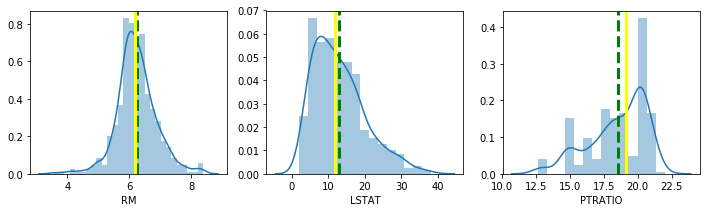

In [20]:
fig, axs = plt.subplots(ncols=3,figsize=(12,3))

plt.figure(1)

for i, var in enumerate(['RM', 'LSTAT', 'PTRATIO']):
    plt.subplot(131 + i)
    sns.distplot(data[var])
    plt.axvline(data[var].mean(), linestyle='dashed', linewidth=3, color='green')
    plt.axvline(data[var].median(), linestyle='solid', linewidth=3, color='yellow')

It seems that RM is somehow normally distributed but LSTAT is skewed to the left and PTRATIO is skewed to the right.

As we chose Decision Tree Model we can use one of its attributes feature_importances_.

The higher result in this attribute's output shows the more important the feature.<br>
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


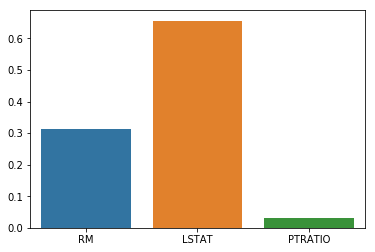

In [22]:
sns.barplot(X_train.columns, reg.feature_importances_)

As I guessed LSTAT is more important in the dataset, but I didn’t think that it’s approximately 2 times more important.  So I think we probably miss something or another factor.

Now I want to see where is the place of these predicted prices comparing other prices.

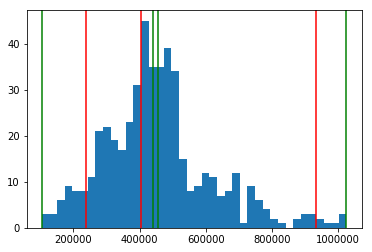

In [28]:
plt.hist(prices, bins=40)

for price in reg.predict(client_data):
    plt.axvline(price, c='r')
    
stat = [minimum_price, maximum_price, mean_price, median_price]

for price in stat:
    plt.axvline(price, c='g')

Predicted price for client no 1 is near mean, for client no 2 is more than 1 STD from mean and for client no 3 is more than 3 STD near to maximum price.

As there are not enough data points for client no2 and client no3, I think our model did not work well for their prices and there are other things that have an important effect on the price that we ignored or deleted them. 

For example look at number 225 and 245 as follows.

The price of number 225 is approximately 100,000 $ higher than 245 but its LSTAT is higher (the more important factor as we saw), RM is lower (however we can say both have 8 rooms). PTRATIO is the only factor in 225 which is better than 245 but on the other hand, it is the least important factor.



In [32]:
data[data.RM >7.5]

,RM,LSTAT,PTRATIO,MEDV
97,8.069,4.21,18.0,812700.0
98,7.820,3.57,18.0,919800.0
176,7.765,7.56,17.8,835800.0
196,7.610,3.11,14.7,888300.0
197,7.853,3.81,14.7,1018500.0
217,8.266,4.14,17.4,940800.0
218,8.040,3.13,17.4,789600.0
220,7.686,3.92,17.4,980700.0
224,8.337,2.47,17.4,875700.0
225,8.247,3.95,17.4,1014300.0


### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [34]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $411,417.39
Trial 3: $355,405.06
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $402,531.82
Trial 10: $413,700.00

Range in prices: $65,217.16


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer: **

This model should not be used in a real-world setting.

1-	There are many factors that have been ignored or seen or even didn’t exist. Maybe at that time, there was not relevant or important but now they may have more effect than old factors. Some of these factors are:  near to public transports, accessing to internet (for example, Wi-Fi blind spots), type of the house (detached, semi-detached, townhouse etc.)

2-	The model does not robust enough to make a consistent prediction, there are other factors that we have to consider like square feet of the plot area. On the other hand, as Sensitivity test showed the margin range is 65,217.16 is high (also every time that we do the test we get another range).

3-	People’s need, neighborhoods, places, and houses have changed over thirty-nine years.




> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.